In [1]:

import pandas as pd
import numpy as np
from scipy import stats

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_42d8fc77575044df9050d8f2f9e60265 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8s6sy5rnnNPlCwsDmICPtJCFjEqkv5qxtcAgjFlY_qQS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_42d8fc77575044df9050d8f2f9e60265.get_object(Bucket='lifeexpentancy-donotdelete-pr-tqlaigwcmnxhcg',Key='life_exp.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:

df=df._get_numeric_data()

df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:

df.replace(" ", np.nan, inplace = True)

In [5]:
missing_data = df.isnull()

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Year
False    2938
Name: Year, dtype: int64

Life expectancy 
False    2928
True       10
Name: Life expectancy , dtype: int64

Adult Mortality
False    2928
True       10
Name: Adult Mortality, dtype: int64

infant deaths
False    2938
Name: infant deaths, dtype: int64

Alcohol
False    2744
True      194
Name: Alcohol, dtype: int64

percentage expenditure
False    2938
Name: percentage expenditure, dtype: int64

Hepatitis B
False    2385
True      553
Name: Hepatitis B, dtype: int64

Measles 
False    2938
Name: Measles , dtype: int64

 BMI 
False    2904
True       34
Name:  BMI , dtype: int64

under-five deaths 
False    2938
Name: under-five deaths , dtype: int64

Polio
False    2919
True       19
Name: Polio, dtype: int64

Total expenditure
False    2712
True      226
Name: Total expenditure, dtype: int64

Diphtheria 
False    2919
True       19
Name: Diphtheria , dtype: int64

 HIV/AIDS
False    2938
Name:  HIV/AIDS, dtype: int64

GDP
False    2490
True      448
Name: GDP, dtype

In [7]:
av = df["Adult Mortality"].astype("float").mean()
df["Adult Mortality"].replace(np.nan, av,inplace=True)

av = df["Alcohol"].astype("float").mean()
df["Alcohol"].replace(np.nan, av,inplace=True)

av = df["Hepatitis B"].astype("float").mean()
df["Hepatitis B"].replace(np.nan, av,inplace=True)

av = df["Polio"].astype("float").mean()
df["Polio"].replace(np.nan, av,inplace=True)

av = df["Total expenditure"].astype("float").mean()
df["Total expenditure"].replace(np.nan, av,inplace=True)

av = df["Diphtheria "].astype("float").mean()
df["Diphtheria "].replace(np.nan, av,inplace=True)

av = df[" BMI "].astype("float").mean()
df[" BMI "].replace(np.nan, av,inplace=True)

av = df[" HIV/AIDS"].astype("float").mean()

df[" HIV/AIDS"].replace(np.nan, av,inplace=True)

av = df["GDP"].astype("float").mean()
df["GDP"].replace(np.nan, av,inplace=True)

av = df["Population"].astype("float").mean()
df["Population"].replace(np.nan, av,inplace=True)

av = df[" thinness  1-19 years"].astype("float").mean()
df[" thinness  1-19 years"].replace(np.nan, av,inplace=True)

av = df[" thinness 5-9 years"].astype("float").mean()
df[" thinness 5-9 years"].replace(np.nan, av,inplace=True)

av = df["Income composition of resources"].astype("float").mean()
df["Income composition of resources"].replace(np.nan, av,inplace=True)

av = df["Schooling"].astype("float").mean()
df["Schooling"].replace(np.nan, av,inplace=True)

df.dropna(subset=["Life expectancy "], axis=0,inplace=True)
df.dropna(subset=["Life expectancy "], axis=0,inplace=True)

In [8]:
df.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [9]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044968,0.032723,0.090864,-0.081840,0.104094,-0.041980,0.094158,0.079003,0.134332,-0.138789,0.094442,0.015180,-0.044835,-0.047888,0.236222,0.207357
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.392403,0.381864,0.204622,-0.157586,0.562397,-0.222529,0.462591,0.209628,0.476441,-0.556556,0.430562,-0.019638,-0.472746,-0.467198,0.692613,0.718640
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.190799,-0.242860,-0.139169,0.031176,-0.383592,0.094146,-0.273295,-0.111753,-0.273601,0.523821,-0.277097,-0.012502,0.300234,0.305739,-0.440145,-0.437283
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.114796,-0.085906,-0.179739,0.501038,-0.227420,0.996628,-0.171049,-0.126781,-0.175524,0.024955,-0.107322,0.548552,0.465586,0.471225,-0.143549,-0.193250
Alcohol,-0.044968,0.392403,-0.190799,-0.114796,1.000000,0.339529,0.074203,-0.051769,0.325881,-0.111769,0.214039,0.300875,0.215567,-0.049686,0.318627,-0.030924,-0.420584,-0.409455,0.417014,0.498127
percentage expenditure,0.032723,0.381864,-0.242860,-0.085906,0.339529,1.000000,0.011935,-0.056831,0.230959,-0.088152,0.147608,0.175126,0.143967,-0.098230,0.888260,-0.024696,-0.252219,-0.253752,0.380700,0.389941
Hepatitis B,0.090864,0.204622,-0.139169,-0.179739,0.074203,0.011935,1.000000,-0.090856,0.139130,-0.185397,0.406378,0.060836,0.498440,-0.103089,0.062220,-0.110465,-0.106916,-0.110118,0.151201,0.165135
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.051769,-0.056831,-0.090856,1.000000,-0.176022,0.507718,-0.136440,-0.104748,-0.142154,0.030673,-0.068226,0.236238,0.224518,0.220776,-0.115666,-0.123651
BMI,0.104094,0.562397,-0.383592,-0.227420,0.325881,0.230959,0.139130,-0.176022,1.000000,-0.237825,0.285145,0.228141,0.283974,-0.243573,0.279651,-0.063243,-0.530805,-0.537784,0.482230,0.519133
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.111769,-0.088152,-0.185397,0.507718,-0.237825,1.000000,-0.189120,-0.128485,-0.196065,0.037783,-0.110858,0.535895,0.467615,0.472087,-0.161423,-0.208693


In [10]:
pearson_coef, p_value = stats.pearsonr(df['Year'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(df['Adult Mortality'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


pearson_coef, p_value = stats.pearsonr(df['infant deaths'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


pearson_coef, p_value = stats.pearsonr(df['Alcohol'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


pearson_coef, p_value = stats.pearsonr(df['percentage expenditure'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


pearson_coef, p_value = stats.pearsonr(df['Hepatitis B'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


pearson_coef, p_value = stats.pearsonr(df['Measles '], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


pearson_coef, p_value = stats.pearsonr(df[' BMI '], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


pearson_coef, p_value = stats.pearsonr(df['under-five deaths '], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


pearson_coef, p_value = stats.pearsonr(df['GDP'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['Income composition of resources'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


pearson_coef, p_value = stats.pearsonr(df['Schooling'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


pearson_coef, p_value = stats.pearsonr(df['Polio'], df['Life expectancy '])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.17003302485909022  with a P-value of P = 1.9642797530298438e-20
The Pearson Correlation Coefficient is -0.696359313769976  with a P-value of P = 0.0
The Pearson Correlation Coefficient is -0.1965571766552618  with a P-value of P = 6.877600360862422e-27
The Pearson Correlation Coefficient is 0.39240331440915244  with a P-value of P = 2.1469024626254117e-108
The Pearson Correlation Coefficient is 0.3818635033900497  with a P-value of P = 2.7730651867230335e-102
The Pearson Correlation Coefficient is 0.20462195134830685  with a P-value of P = 4.7680638832260063e-29
The Pearson Correlation Coefficient is -0.15758580377505832  with a P-value of P = 9.727313358961875e-18
The Pearson Correlation Coefficient is 0.5623967518259669  with a P-value of P = 6.853943082461484e-244
The Pearson Correlation Coefficient is -0.2225291159511755  with a P-value of P = 3.545609547737577e-34
The Pearson Correlation Coefficient is 0.43056150283520594  with a P-value of

In [11]:
df=df[[' BMI ','Adult Mortality','Income composition of resources','Schooling','Life expectancy ']]

In [12]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [13]:

y_data = df['Life expectancy ']
x_data=df.drop('Life expectancy ',axis=1)

In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 732
number of training samples: 2196


In [15]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [16]:
from sklearn.metrics import r2_score

In [17]:
from sklearn.preprocessing import PolynomialFeatures

Text(3, 0.75, 'Maximum R^2 ')

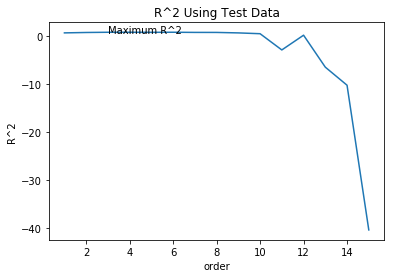

In [18]:
Rsqu_test = []

order = [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[[' BMI ','Adult Mortality','Income composition of resources','Schooling']])
    
    x_test_pr = pr.fit_transform(x_test[[' BMI ','Adult Mortality','Income composition of resources','Schooling']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [19]:
pr=PolynomialFeatures(degree=4)
x_train_pr=pr.fit_transform(x_train[[' BMI ','Adult Mortality','Income composition of resources','Schooling']])
x_test_pr=pr.fit_transform(x_test[[' BMI ','Adult Mortality','Income composition of resources','Schooling']])
x_test_pr.shape

(732, 70)

In [20]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
yhat = poly.predict(x_test_pr)

In [22]:
print("R2-score: %.2f" % r2_score(y_test,yhat) )

R2-score: 0.88


In [23]:
from sklearn.linear_model import Ridge

In [24]:
RigeModel=Ridge(alpha=0.11111111)

In [25]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.11111111, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
yhat = RigeModel.predict(x_test)

In [27]:
print("R2-score: %.2f" % r2_score(y_test,yhat) )

R2-score: 0.75


In [28]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train, y_train)
    Rsqu_test.append(RigeModel.score(x_test, y_test))
    Rsqu_train.append(RigeModel.score(x_train, y_train))

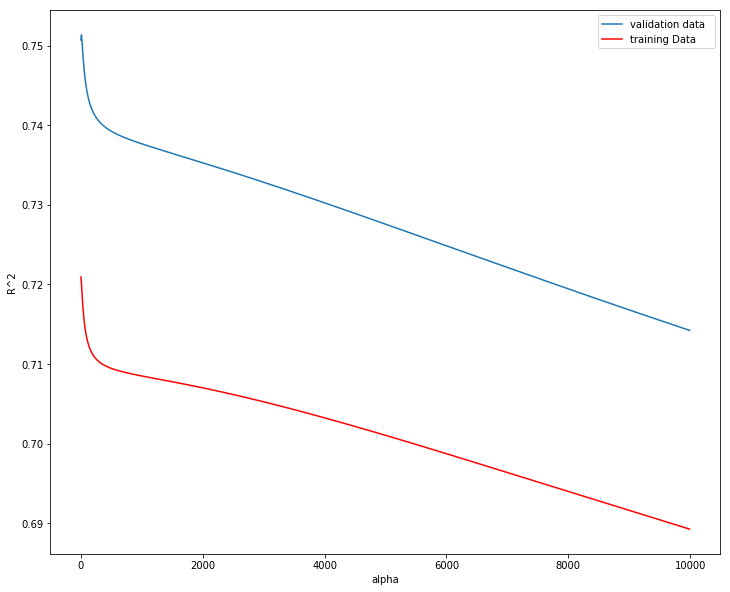

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [30]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.0011111,0.11111111,0.111, 0.110, 100, 1000, 10000, 100000, 100000]}]

RR=Ridge()

Grid1 = GridSearchCV(RR, parameters1,cv=4)

Grid1.fit(x_data[[' BMI ','Adult Mortality','Income composition of resources','Schooling']], y_data)



BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=0.11111111, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

BestRR.score(x_test[[' BMI ','Adult Mortality','Income composition of resources','Schooling']], y_test)


yhat=Grid1.predict(x_test)

print(r2_score( y_test,yhat))



newin=[[12.1,256,0.45,10.1]]
newpot=Grid1.predict(newin)
newpot

0.7527319447404331


array([61.11900238])

In [31]:
!pip install watson-machine-learning-client

In [32]:

from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-20 18:12:32,725 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [33]:
wml_credentials={
 
  "apikey": "tNvT2EWpt8rdEGQ0L9wLQ0ao3vv16w_uLVGittXsx96A",
  
  
  
  
  "instance_id": "691a6e8d-be3c-4dfe-b08b-35d1da82af54",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [34]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [35]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "srinidhi", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "srinidhi.a30@gmail.com", 
               client.repository.ModelMetaNames.NAME: "life_exp"}

In [36]:
model_artifact =client.repository.store_model(Grid1, meta_props=model_props)

In [37]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [38]:
published_model_uid

'fb636fd3-fafe-429a-8c54-eeac60183ff6'

In [39]:
deployment = client.deployments.create(published_model_uid, name="life_exp")



#######################################################################################

Synchronous deployment creation for uid: 'fb636fd3-fafe-429a-8c54-eeac60183ff6' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8cec25f9-c779-4d35-b57b-e87d2fc79418'
------------------------------------------------------------------------------------------------




In [40]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [41]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/691a6e8d-be3c-4dfe-b08b-35d1da82af54/deployments/8cec25f9-c779-4d35-b57b-e87d2fc79418/online'